# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import functools
import seaborn.objects as so
import collections
from fastcore.basics import patch

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int,r:float):
        self.n = n
        self.r = r
        self.points = np.random.default_rng().random((n,2))
    
    @functools.cached_property
    def distances(self):
        return np.array([np.sqrt(np.sum((x- self.points)**2, axis=1)) for x in self.points])

    @functools.cached_property
    def adj(self):
        mask = self.distances < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}
    


In [ ]:
rgg = RGG(100,0.1)

In [ ]:
rgg.adj

{0: [3, 5, 34],
 1: [2, 73],
 2: [1],
 3: [0, 5, 34],
 4: [33, 65, 89, 91],
 5: [0, 3, 34],
 6: [10, 46, 69],
 7: [9, 41, 56, 88, 97],
 8: [23, 27, 32, 67, 87],
 9: [7, 41, 56, 69, 74],
 10: [6, 16, 46],
 11: [17, 19, 39, 44, 54],
 12: [25, 83, 90],
 13: [63],
 14: [40, 59, 93],
 15: [20, 80, 83, 90],
 16: [10, 46],
 17: [11, 19, 44, 54, 86],
 18: [35],
 19: [11, 17, 44, 62, 86],
 20: [15],
 21: [94],
 22: [51],
 23: [8, 27, 32, 67, 87],
 24: [40, 59],
 25: [12, 29, 50, 90],
 26: [82],
 27: [8, 23, 32, 67, 87],
 28: [58, 73, 99],
 29: [25, 43, 50],
 30: [63, 80],
 31: [43, 61, 70, 88],
 32: [8, 23, 27, 67, 87],
 33: [4, 65, 89, 99],
 34: [0, 3, 5, 91],
 35: [18, 71],
 36: [84],
 37: [48, 52],
 38: [95],
 39: [11, 54, 93],
 40: [14, 24, 59, 93],
 41: [7, 9, 56, 74, 95, 97],
 42: [],
 43: [29, 31, 70],
 44: [11, 17, 19, 62, 86],
 45: [],
 46: [6, 10, 16, 69],
 47: [],
 48: [37],
 49: [],
 50: [25, 29, 53],
 51: [22],
 52: [37, 75],
 53: [50],
 54: [11, 17, 39],
 55: [78],
 56: [7, 9, 41,

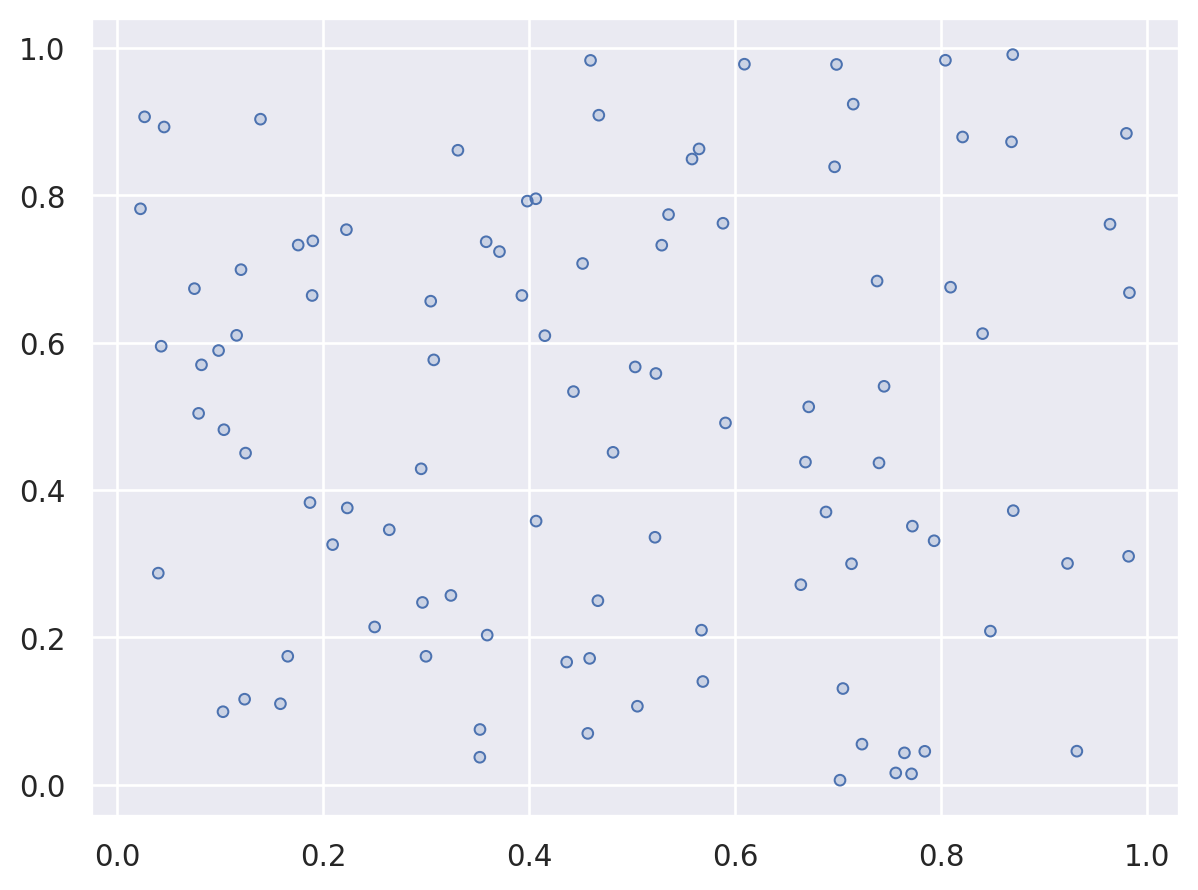

In [ ]:
p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
#| export
@patch
def n_comp(self:RGG):
    def dfs(gr,s):
        for v in gr[s]:
            if v not in self.parent:
                self.parent[v]=s
                dfs(gr,v)
                self.topo.append(v)
    self.parent = {}
    self.topo=[]
    count = 0
    for i in range(self.n):
        if i not in self.parent:
            count+=1
            self.parent[i]=None
            dfs(self.adj,i)
            self.topo.append(i)
    return count


In [ ]:
rgg.n_comp()

19

In [ ]:
#| export
@patch
def degree_distribution(self: RGG):
    dgr=collections.Counter([len(v) for _,v in self.adj.items()])
    return np.array(list(dgr.items()))

In [ ]:
d_np = rgg.degree_distribution()
d_np

array([[ 3, 18],
       [ 2, 11],
       [ 1, 24],
       [ 4, 22],
       [ 5, 14],
       [ 6,  4],
       [ 0,  7]])

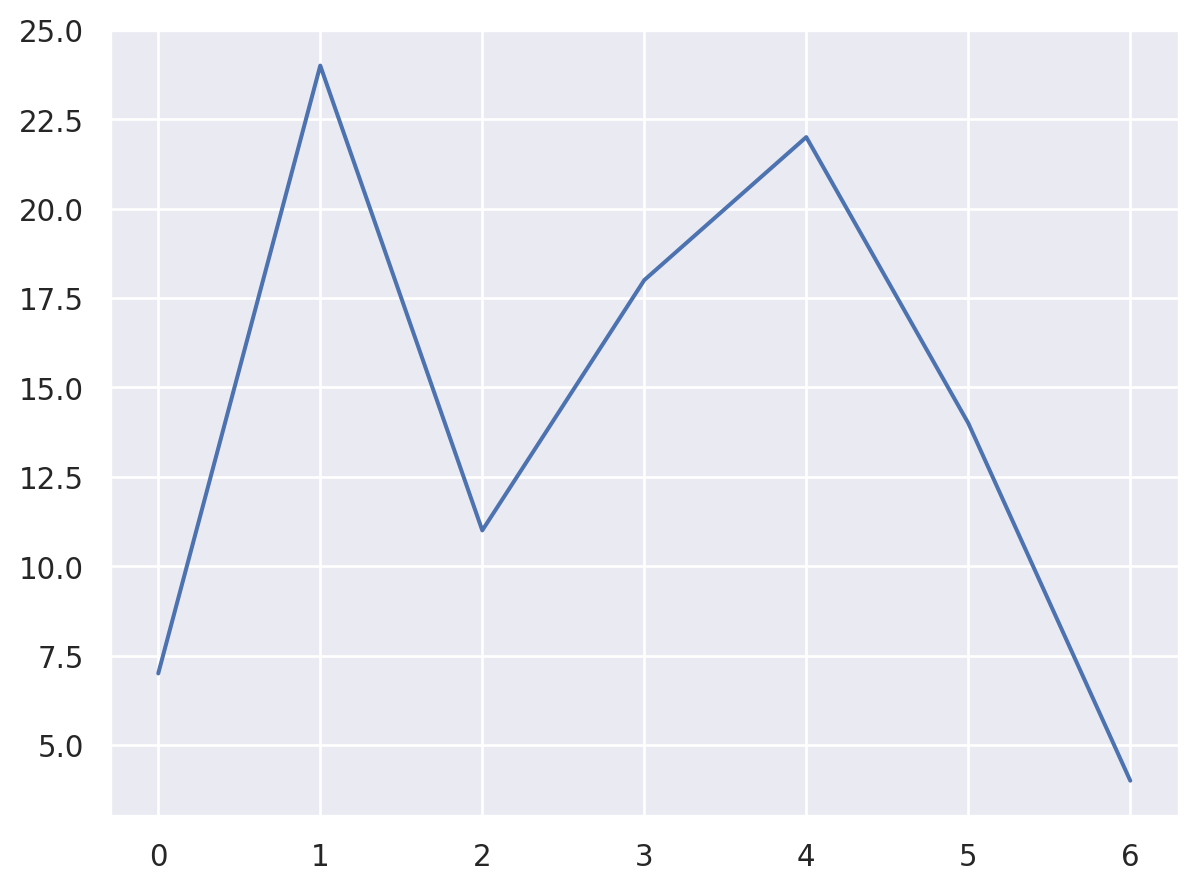

In [ ]:
(
    so.Plot(x=d_np[:,0], y=d_np[:,1])
    .add(so.Line())
)

In [ ]:
#| export
@patch
def cyclic(self:RGG):
    for k, lst in self.adj.items():
        for v in lst:
            if k != self.parent[v] and v!=self.parent[k]: 
                return True
    return False

In [ ]:
rgg.cyclic()

True

In [ ]:
#| export
@patch
def n_tri(self:RGG):
    A = (self.distances<=self.r).astype(np.int64)
    np.fill_diagonal(A,0)
    return np.trace(np.linalg.matrix_power(A,3))//6

In [ ]:
rgg.n_tri()

83

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()